# Data Visualization Project 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import ast

df = pd.read_csv('imdb_movies_shows.csv')
df.head()

<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:7: SyntaxWarning: invalid escape sequence '\i'
C:\Users\muham\AppData\Local\Temp\ipykernel_3868\903035508.py:7: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('Netflix Movies and Shows\imdb_movies_shows.csv')


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [28]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


In [29]:
df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
dtype: object

In [30]:
df.drop('seasons', axis=1, inplace=True)

In [31]:
df.drop('age_certification', axis=1, inplace=True)

In [32]:
df.isnull().sum()

title                     1
type                      0
release_year              0
runtime                   0
genres                    0
production_countries      0
imdb_id                 444
imdb_score              523
imdb_votes              539
dtype: int64

In [33]:
df.drop('imdb_id', axis=1, inplace=True)

In [34]:
df.dropna(subset=["title"], axis=0)

,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,NaN
1,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],8.2,530877.0
3,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],8.0,392419.0
4,The Exorcist,MOVIE,1973,133,['horror'],['US'],8.1,391942.0
...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",['NG'],6.9,39.0
5802,Edis Starlight,MOVIE,2021,74,"['music', 'documentation']",[],NaN,NaN
5803,Clash,MOVIE,2021,88,"['family', 'drama']","['NG', 'CA']",6.5,32.0
5804,Shadow Parties,MOVIE,2021,116,"['action', 'thriller']",[],6.2,9.0


In [35]:
modus = df['title'].mode()[0]
df['title'] = df['title'].fillna(modus)

In [36]:
df.isnull().sum()

title                     0
type                      0
release_year              0
runtime                   0
genres                    0
production_countries      0
imdb_score              523
imdb_votes              539
dtype: int64

In [37]:
rata_imdb_score = df['imdb_score'].mean()
df['imdb_score'] = df['imdb_score'].fillna(rata_imdb_score)

In [38]:
rata_imdb_votes = df['imdb_votes'].mean()
df['imdb_votes'] = df['imdb_votes'].fillna(rata_imdb_votes)

In [39]:
df.isnull().sum()

title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
dtype: int64

In [40]:
x = df['release_year'].value_counts().sort_values(ascending=False).cumsum()
cumulative = round(x/df.release_year.value_counts().sum()*100,2)
cumulative

release_year
2019     14.61
2020     28.47
2018     41.80
2021     54.86
2017     64.85
         ...  
1961     99.93
1968     99.95
1977     99.97
1963     99.98
1960    100.00
Name: count, Length: 67, dtype: float64

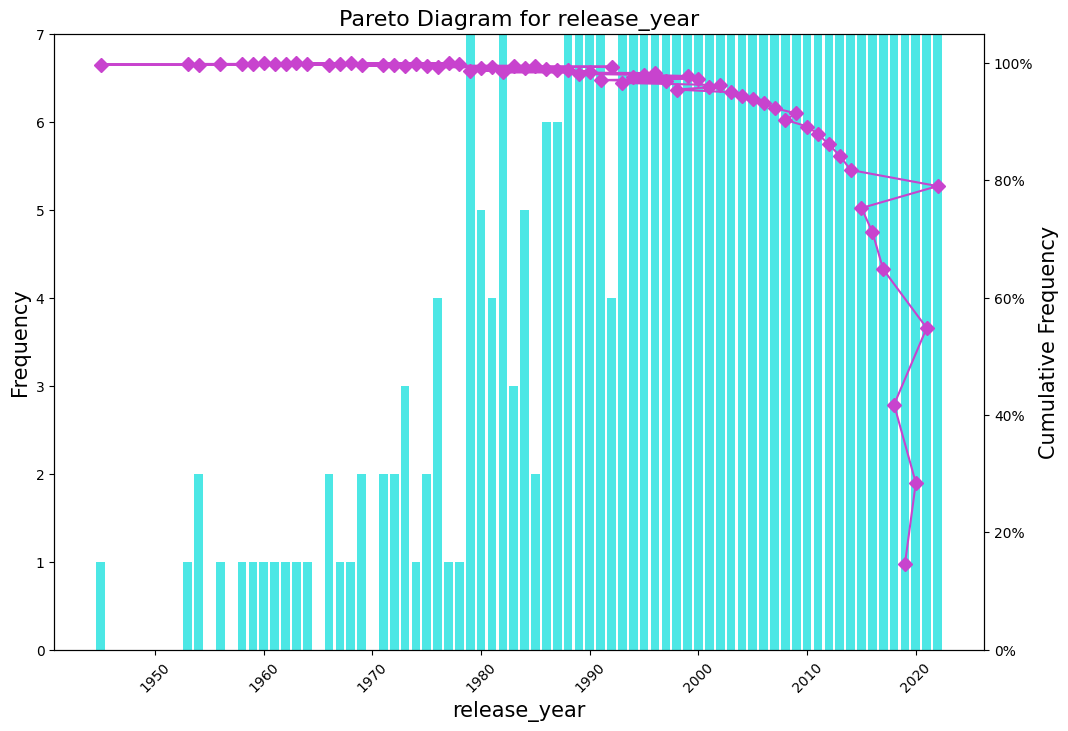

In [41]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df['release_year'].value_counts().sort_values(ascending=False).index,
df['release_year'].value_counts ().sort_values (ascending=False), color="#4CE7E5")
ax2 = ax.twinx()
ax2.plot(x.index, cumulative, color="#C843CE", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="x", colors="black", rotation=45)
ax2.tick_params(axis="x", colors="black", rotation=45)
ax2.set_ylim(0,105)
ax.set_ylim(0,7)
ax.set_xlabel('release_year', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax2.set_ylabel('Cumulative Frequency', fontsize=15)
plt.title('Pareto Diagram for release_year', fontsize=16)
plt.show()

In [42]:
# Ubah string jadi list dengan ast.literal_eval (lebih aman daripada eval)
df['genres'] = df['genres'].apply(ast.literal_eval)

# Lanjutkan step flatten → count → plot
all_genres = [genre.strip() for sublist in df['genres'] for genre in sublist]

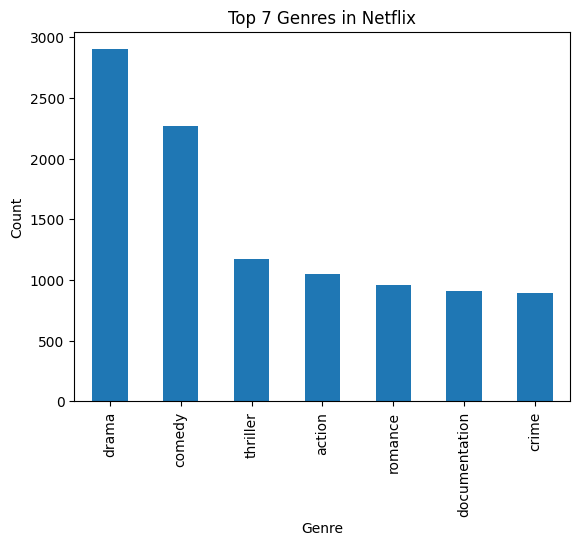

In [50]:
df_exploded = df.explode('genres')

df_exploded['genres'].value_counts().head(7).plot(kind='bar')
plt.title('Top 7 Genres in Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_3868\2800139020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.boxplot(


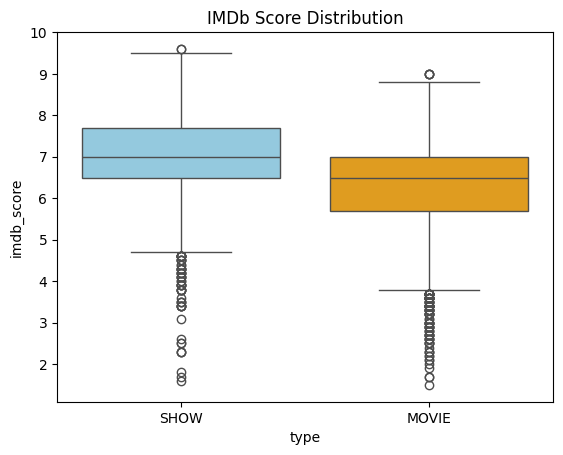

In [51]:
sea.boxplot(
    x='type',
    y='imdb_score',
    data=df,
    palette={'SHOW': 'skyblue', 'MOVIE': 'orange'}
)

plt.title("IMDb Score Distribution")
plt.show()


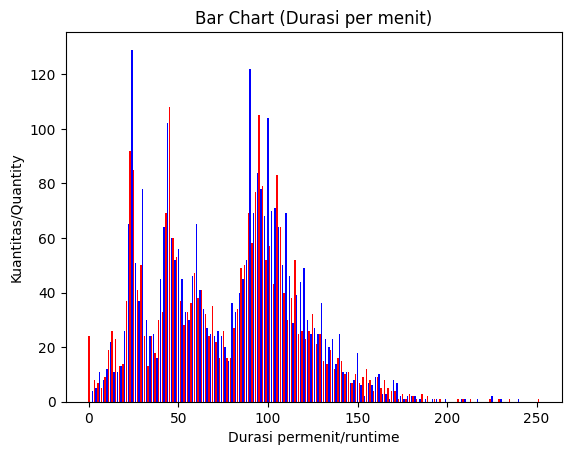

In [45]:
age = df['runtime']
colors = ['red', 'blue']

runtime_counts = df['runtime'].value_counts().sort_index()
plt.bar(runtime_counts.index, runtime_counts.values, color = colors)

# BarChart:
plt.title('Bar Chart (Durasi per menit)')
plt.xlabel('Durasi permenit/runtime')
plt.ylabel('Kuantitas/Quantity')

plt.show()

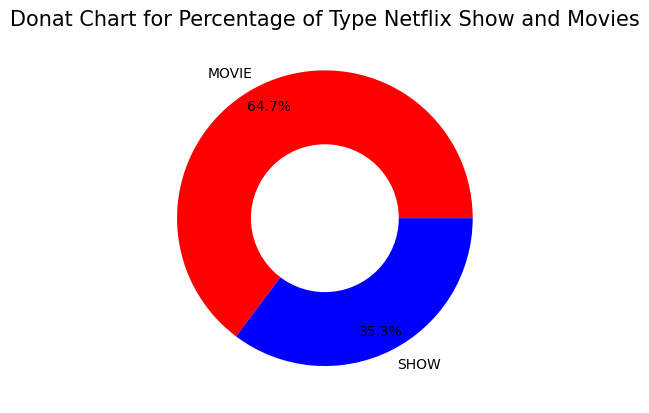

In [46]:
#Donut Chart

#define data
x = df['type'].value_counts()
labels = df ['type'].value_counts().index

#colors
colors = ['#FF0000', '#0000FF', '#FFFF00']

#Pie Chart
plt.pie(x, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

#Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#Adding Title of chart
plt.title('Donat Chart for Percentage of Type Netflix Show and Movies', fontsize=15)

#Displaying Chart
plt.show()

In [47]:
df.to_csv("data netflix movies and show yang bersih.csv")